In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6"  color="red">ch11. 데이터프레임과 시리즈(Pandas)_1~8절 </font></b>
- pip install pandas
 
# 1절 판다스 패키지
- 데이터 분석을 위해 반드시 알아야할 패키지. 넘파이를 기반으로 하며, 
  다른 많은 라이브러리와 잘 통합하도록 설계
- 2차원 구조를 갖는 데이터프레임, 1차원 구조를 갖는 시리즈를 제공 

- 판다스 장점 : * 데이터프레임생성, 파일io, 레이블링, 부분데이터 추출, 
              * 크기변경(행이나 열 삽입, 삭제), 데이터 분할, 병합, 데이터구조변경,결측치 처리, 
                
- https://pypi.python.org/pypi/pandas(package index)
- http://pandas.pydata.org/pandas-docs/stable/api.html(API reference)


In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [4]:
pd.read_json?

In [8]:
data = pd.read_json('data/ch09_member1.json',encoding='cp949')    # 기본 encoding은 utf-8
display(data)                                                     # print보다는 display가 데이터프레임에서는 쓰임
print(type(data))

,Name,Age,Email,Address
0,신길동,30,sg@hong.com,서울
1,홍길동,20,ho@hong.com,수원
2,마길동,25,ma@hong.com,안양


<class 'pandas.core.frame.DataFrame'>


In [9]:
member4 = pd.read_csv('data/ch09_member4.csv')               # 기본 encoding=utf-8
member4

,Name,Age,Email,Address
0,신길동,30,sg@hong.com,서울
1,홍길동,20,ho@hong.com,수원
2,마길동,25,ma@hong.com,안양


In [12]:
# header가 없는 경우
member1 = pd.read_csv('data/ch09_member1.csv',header=None,names=['name','age','email','address'])
member1

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2절 데이터프레임 만들기
## 2.1 딕셔너리 리스트를 이용해서 데이터프레임 만들기

In [14]:
d = [{'kor':100,'mat':95},{'kor':90,'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [15]:
df.to_dict()    # 데이터프레임을 딕셔너리로 

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [17]:
df.to_numpy()   # 데이터프레임을 넘파이배열로
df.values       # 데이터프레임을 넘파이배열로

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [19]:
df.dtypes       # 열의 타입

kor    int64
mat    int64
dtype: object

In [20]:
df.info()       # ★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [21]:
df['kor'].dtype

dtype('int64')

In [25]:
# 타입변경(열마다)
import numpy as np
df['kor'].astype(np.float64)
# df['kor'].astype('float64')             실제 바뀌는게 아니라 바뀐 상태를 출력
df['kor'] = df['kor'].astype('float64')  # kor열의 타입을 float64로

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [30]:
d = [{'kor':100.0,'mat':95},{'kor':90,'mat':99},{'kor':92,'eng':99}]
df = pd.DataFrame(data=d)
df

,kor,mat,eng
0,100.0,95.0,NaN
1,90.0,99.0,NaN
2,92.0,NaN,99.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      float64
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(3)
memory usage: 200.0 bytes


In [29]:
type(np.nan)        # np.nan 결측치

float

In [32]:
df['kor']=df['kor'].astype('int32')
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [34]:
# 결측치는 int로 형변환 불가(결측치를 대체값으로 치환 후, 변환)
# df['mat']=df['mat'].astype('int32')

## 2.2 리스트를 이용해서 데이터프레임 만들기

In [36]:
kor = [100,90,95,90,65]
mat = [99,100,95,98,94]
df = pd.DataFrame({'kor':kor,'mat':mat})
df.head(2)      # 상위 2행만 

,kor,mat
0,100,99
1,90,100


In [37]:
np.c_[kor,mat]

array([[100,  99],
       [ 90, 100],
       [ 95,  95],
       [ 90,  98],
       [ 65,  94]])

In [40]:
df = pd.DataFrame(data=np.c_[kor,mat], columns =['국어','수학'])
df

,국어,수학
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [41]:
df.shape

(5, 2)

In [44]:
l = [['트렌드 코리아2026','김난도',18000,10],
     ['사탄탱고','라슬로',17820,10],
     ['미술관 여행자','카미유주노',29700,10]]
df = pd.DataFrame(l,columns=['책이름','저자','가격','할인율'])
df

,책이름,저자,가격,할인율
0,트렌드 코리아2026,김난도,18000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미유주노,29700,10


In [ ]:
# %ls   : ipython 매직명령어
# !dir  : 쉘명령어

## [예] csv불러오기

In [48]:
%ls "c:/ai/downloads/shareData/상가정보"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 c:\ai\downloads\shareData\상가정보 디렉터리

2025-10-12  오후 03:33    <DIR>          .
2025-10-12  오후 03:33    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 소상공인시장진흥공단

In [53]:
df = pd.read_csv('c:/ai/downloads/shareData/상가정보/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv',
                 encoding='utf-8',sep=',',# 기본값 생략가능
                nrows=70) # 처음 70행만 가져오기
df.shape

(70, 39)

In [54]:
df.head(1)   # 상위1행만

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [57]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns =39  # 39열까지 display 가능. 기본값은 20
pd.options.display.max_rows = 70    # 70행까지 display 가능. 기본값은 60

In [59]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [60]:
df.head(1).T

,0
상가업소번호,MA010120220800000033
상호명,부동산임대김은숙
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I212
상권업종중분류명,비알코올
상권업종소분류코드,I21201
상권업종소분류명,카페
표준산업분류코드,I56229


## 2.3 read_csv

In [62]:
# help(pd.read_csv)
# pd.read_csv() # 함수 안에서 shift+tab+tab
pd.read_csv?

### (1) csv 파일 불러오기(기본값)

In [66]:
# (1) csv 파일 불러오기(기본값)
member = pd.read_csv('data/ch11_member.csv',
                    #,encoding='utf-8',sep=',',comment 주석처리X
                    )
member.info()
member

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [72]:
# 문자형으로 읽어들인 Birth를 datatime형으로
# 형변환 : astype('int64'), astype('datetime64'  : 비추)
#         to_datetime() 함수
# member['Birth'].astype('datetime64')  비추
member['Birth'] = pd.to_datetime(member['Birth'])   # 강추
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [70]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [74]:
import numpy as np
member['Age'] = member["Age"].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

### (2) 특정행을 제외하고 csv 파일 읽어오기

In [76]:
member = pd.read_csv('data/ch11_membercp949.csv',
                    encoding='cp949',
                    skiprows=[1,6]) # 1,6번째 행 제외하고 읽어오기(시작은 1부터)
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### (3) 상위 몇행만 / sep문자는  ,  아닌 csv파일 읽어오기

In [79]:
member = pd.read_csv('data/ch11_membersep.csv',
                    nrows=5,  # 상위 5행만
                    sep='|')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### (4) 주석(#)제외, datetime형 필드를 지정하여 csv 파일 읽어오기

In [87]:
member =  pd.read_csv('data/ch11_membertab.csv',
                     sep='\t',                   # 구분자 설정
                     comment='#',                # 주석제외
                     parse_dates=['Birth'])      # datetime64형으로 읽어올 필드 지정
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [88]:
print(member.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes
None


##  2.4 패키지에서 가져오기 : iris 데이터

- iris 가져오기 방법1 : sklearn(머신러닝 패키지)
- iris 가져오기 방법2 : statsmodels(R 데이터)
- iris 가져오기 방법3 : seaborn(시각화패키지)
### 2.4.1 iris 방법1 : sklearn
- sklearn.datasets 모듈 데이터(iris)를 데이터 프레임으로 변환

In [99]:
from sklearn import datasets   # 머신러닝을 공부할 때 필요한 학습데이터셋 제공
# sklearn 패키지에서 제공되는 데이터셋은 딕셔너리 형식으로 제공
iris =  datasets.load_iris()
print(type(iris))      # Brunch타입(딕셔너리를 상ㅅ혹받은 타입) 딕셔너리처럼 동작
#print(iris.DESCR)      # iris 데이터셋의 설명
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [101]:
iris.data           #독립변수
iris['data'][:3]    #상위 3행

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [102]:
# 데이터프레임의 열이름(비추)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [105]:
# 데이터프레임의 열이름(강추)
[col[:-5].replace(' ','_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [110]:
# ML/DL 학습시 종속변수(타겟변수)
iris.target
#iris['target'], iris.get('target')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [112]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [114]:
iris.target_names[iris.target]  # 데이터프레임에 쓸 타겟변수(가장 오른쪽 열)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [121]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target].reshape(-1,1)
print(data[:3],'\n',target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 
 [['setosa']
 ['setosa']
 ['setosa']]


In [119]:
print('독립변수 shape:', data.shape)
print('타겟변수 shape:', target.shape)

독립변수 shape: (150, 4)
타겟변수 shape: (150, 1)


### (1) 독립변수와 종속변수를 stack한 후 데이터프레임으로

In [144]:
df = pd.DataFrame(np.hstack((data,target)),
                 columns=iris.feature_names + ['species'])
# df
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [146]:
#df.species
#df.sepal length(cm) 에러
# df['sepal length (cm)']
df.columns = [col[:-5].replace(' ','_') for col in iris.feature_names] + ['species']
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [147]:
df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: object

### (2) 독립변수, 종속변수를 따로 데이터프레임으로 생성 -> 두 데이터프레임을 연결

In [148]:
X = pd.DataFrame(iris.data,
                columns = [col[:-5].replace(' ','_') for col in iris.feature_names])
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [149]:
y = pd.DataFrame(iris.target_names[iris.target],columns=['species'])
y.head(1)

,species
0,setosa


In [155]:
print('X의 shape : ', X.shape)
print('y의 shape : ', y.shape)
print('X의 index : ', X.index)
print('y의 index : ', y.index)

X의 shape :  (150, 4)
y의 shape :  (150, 1)
X의 index :  RangeIndex(start=0, stop=150, step=1)
y의 index :  RangeIndex(start=0, stop=150, step=1)


In [159]:
iris_df = pd.concat([X,y], axis=1)  # 두개의 데이터프레임을 열로 연결
print(iris_df)
iris_df.info()

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
-

### 2.4.2  iris방법2 : statsmodels

### (1) R 패키지의 기본 데이터 가져오기

In [3]:
#R 패키지의 기본 데이터 가져오기
from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris',
                                    package='datasets',
                                    cache=True)  # 한번 다운로드한 데이터를 pc에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [5]:
iris = iris_dataset.data
iris.head()   # 상위 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris['Species']
# iris.Species   # 동일
# iris.Species.Length  # 열이름에 .이 있으면 iris.Species.Length 접근불가

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [14]:
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### 2.4.3 iris 방법3 : seaborn  (많이 사용)

In [16]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### (1) 데이터프레임을 파일로 출력

In [18]:
# 데이터프레임을 파일로 출력
iris.to_csv('data/ch11_iris.csv',
           sep=',', encoding='utf-8', # 기본값
           index=False)              # 행 이름이 생략되서 파일 출력

In [19]:
#압축해서 다운받기
iris.to_csv('data/ch11_iris.csv.gz',   # 889B 메모리
           index=False,
           compression='infer')       # 파일 확장자에 맞게 압축해라

### (2) 읽어들이기

In [21]:
import pandas as pd
read_iris = pd.read_csv('data/ch11_iris.csv')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [22]:
# 압축된 파일 읽어오기
import pandas as pd
read_iris = pd.read_csv('data/ch11_iris.csv.gz',compression='infer')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3절 이름 지정하기 (행이나 열 이름)

## 3.1 열이름 지정하기

In [26]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])   # 결축치가 없을 때 가능.
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [30]:
member.columns = ['이름','나이','메일','주소','생일']     # 열 수에 따라 문자수를 기입
member.head()

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정하기

In [28]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [32]:
# 숫자로 지정
member.index = range(11,16)
member

,이름,나이,메일,주소,생일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [34]:
# 숫자 이외 지정
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### * 항목(행/열) 읽어오기

In [42]:
# member['동','이름'] # 행이름 바로 못씀 : 열이름이나 조건만 쓸 수 있음
# 비추 member['이름']['동']  # 비추
member.loc['동','이름']   # 행과 열이름으로  부분 데이터 조회 : loc
print(member.loc['동','이름'])
print(member.loc['북','주소'])

홍길동
서울시 관악구


### * index를 이름열로 

In [40]:
# index를 이름열로 ( 실행결과가 출력되서 나오면 return 될뿐, member는 안바뀜)
# member를 수정하려면 (1)할당 (2) inplace 매개변수에 True(기본값 False)
member.set_index('이름')
member.head(1)

,이름,나이,메일,주소,생일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [43]:
member.set_index('이름',inplace=True)   # True시 리턴값을 가지지 않기때문에 할당하면 안됨

In [44]:
member

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [45]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

### * 인덱스를 컬럼으로  편입시키기

In [47]:
member.reset_index(inplace=True)

In [48]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [49]:
member.index = [0,1,2,0,1]
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### * 기존의 index를 새로운 열에 편입시키지 않고 제거한 후, 새로운 숫자 index로 초기화

In [56]:
# member.index = range(len(member))
# 기존의 index를 새로운 열에 편입시키지 않고 제거한 후, 새로운 숫자 index로 초기화
member.reset_index(drop=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [57]:
member = member.reset_index(drop=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### *시리즈.dt : datetime열에서 날짜 및 시간에 관련된 정보를 추출 

In [63]:
#datetime열에서 날짜 및 시간에 관련된 정보를 추출 : 시리즈.dt
print(member['생일'])
print(member['생일'].dt.year)
print(member['생일'].dt.month)
print(member['생일'].dt.weekday)  # 0 월, 1 화, ... 5 토, 6 일

0   1999-01-01
1   1999-12-01
2   1999-11-01
3   1999-05-01
4   1999-01-30
Name: 생일, dtype: datetime64[ns]
0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생일, dtype: int64
0     1
1    12
2    11
3     5
4     1
Name: 생일, dtype: int64
0    4
1    2
2    0
3    5
4    5
Name: 생일, dtype: int64


## 3.3 레벨 이름 지정하기

In [65]:
print(member.columns)
print(member.columns.name)

Index(['이름', '나이', '메일', '주소', '생일'], dtype='object')
None


In [66]:
member.columns.name = '정보'
member

정보,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### * 컬럼  레벨 지정

In [67]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                 ['이름','나이','메일','주소','생일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [68]:
member.index = [['좌우','좌우','상하','상하','상하'],
               ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [69]:
# member.loc['행이름','열이름']  # 1차원일때
member.loc[('상하','북'),('기본정보','이름')]

'홍길북'

In [70]:
member.loc['상하','기본정보']  # 이것일때 유리

소분류,이름,나이,메일
레벨2,,,
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


In [71]:
member.loc[('상하','중'),'기본정보']

소분류
이름             홍길중
나이              23
메일    mid@hong.com
Name: (상하, 중), dtype: object

# <font color='red'> 4절  부분 데이터 조회</font>

## 4.1 단일 열 조회

In [73]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [76]:
#member[0]   # 행이름으로 []조회할 경우 에러  => loc으로 조회해야함

In [79]:
member['Name']

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

### * 여러 열 조회

In [77]:
member[['Name',"Address"]]

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2  loc을 이용한 조회
 
- df.loc[행이름, 열이름] : 행이름, 열이름으로 조회
    * 행이름과 열이름 자리에 슬라이싱 from: to  =>from부터 to까지(to포함)
    * 행이름과 열이름 자리에 리스트

In [85]:
print(member.loc[0])
print('=================================')
print(member.loc[0:2])
print('=================================')
print(member.loc[0:2,:]) # 모든열을 다 출력할 경우 열생략 가능
print('=================================')
print(member.loc[0:2,...])

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 0, dtype: object
  Name  Age          Email  Address      Birth
0  홍길동   20  hong@hong.com  서울시 강동구 1999-01-01
1  홍길서   30   seo@hong.com   서울시 중구 1999-12-01
2  홍길남   21   nam@hong.com  서울시 강동구 1999-11-01
  Name  Age          Email  Address      Birth
0  홍길동   20  hong@hong.com  서울시 강동구 1999-01-01
1  홍길서   30   seo@hong.com   서울시 중구 1999-12-01
2  홍길남   21   nam@hong.com  서울시 강동구 1999-11-01
  Name  Age          Email  Address      Birth
0  홍길동   20  hong@hong.com  서울시 강동구 1999-01-01
1  홍길서   30   seo@hong.com   서울시 중구 1999-12-01
2  홍길남   21   nam@hong.com  서울시 강동구 1999-11-01


In [261]:
# 숫자 이외 문자도 가능
member.index =['동','서','남','북','중']
member.loc['동':'남']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [262]:
# 행 열 모두
member.loc['동':'남','Name':'Address'] # 동~남행, Name~Address열까지

,Name,Age,Email,Address


### <font color=red>*원하는 부분 조회</font>

In [263]:
# 동,남행, Name,Email,Address열
member.loc[['동','남'],['Name','Email','Address']]

KeyError: "None of [Index(['동', '남'], dtype='object')] are in the [index]"

In [264]:
member.loc[:,'Name']  #member.loc[:,':Name']

0     홍길동
1     홍길서
2     홍길남
3     홍길북
4     홍길중
5    #홍길뜽
Name: Name, dtype: object

## 4.3 iloc을 이용한 조회
```
- df.iloc[행순번, 열순번] : 행순번, 열순번로 조회
    *행순번과 열순번 자리에 슬라이싱 from:to:by  =>from부터 to앞까지(to 미포함)
    *행순번과 열순번 자리에 리스트

```

In [265]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [266]:
print(member.iloc[0])

Name                 홍길동
Age                   20
Email      hong@hong.com
Address          서울시 강동구
Birth         1999-01-01
Name: 0, dtype: object


###  *동(0)행부터 남(2)행까지 모든 열

In [267]:
member.iloc[0:3]
member.iloc[0:3,]
member.iloc[0:3,:]
member.iloc[0:3,...]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [268]:
# 0번째 행
print(member.iloc[0])
type(member.iloc[0])

Name                 홍길동
Age                   20
Email      hong@hong.com
Address          서울시 강동구
Birth         1999-01-01
Name: 0, dtype: object


pandas.core.series.Series

###  *동(0)행부터 남(2)행까지 Name(0)열부터 Address(3) 열까지

In [269]:
member.iloc[0:3,0:4]
member.iloc[0:3,0:-1]

,Name,Age,Email,Address
0,홍길동,20,hong@hong.com,서울시 강동구
1,홍길서,30,seo@hong.com,서울시 중구
2,홍길남,21,nam@hong.com,서울시 강동구


### * 짝수번째 행의 마지막 열을 제회하고 출력

In [270]:
# 짝수번째 행의 마지막 열을 제회하고 출력
member.iloc[::2,:-1]

,Name,Age,Email,Address
0,홍길동,20,hong@hong.com,서울시 강동구
2,홍길남,21,nam@hong.com,서울시 강동구
4,홍길중,23,mid@hong.com,부산시 중구


### * 마지막행부터 처음행까지 거꾸로 출력

In [271]:
member.iloc[::-1]

,Name,Age,Email,Address,Birth
5,#홍길뜽,24,non@not.com,없는구,2000-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


###  *동(0)행과 남(2)행, Name(0)열,Email(2)열,Address(3)열

In [272]:
member.iloc[[0,2],[0,2,3]]

,Name,Email,Address
0,홍길동,hong@hong.com,서울시 강동구
2,홍길남,nam@hong.com,서울시 강동구


### *Name(0)열

In [273]:
member.iloc[:,0]
# member.iloc[...,0]

0     홍길동
1     홍길서
2     홍길남
3     홍길북
4     홍길중
5    #홍길뜽
Name: Name, dtype: object

## 4.4 <font color='red'>★</font>조건으로 조회하기

In [274]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [275]:
member['Name'] == '홍길남'

0    False
1    False
2     True
3    False
4    False
5    False
Name: Name, dtype: bool

### * Name이 홍길남인 행 모두

In [276]:
member[member['Name'] == '홍길남']
member.loc[member['Name'] == '홍길남']
# member.loc[[False,False,True,False,False]]

,Name,Age,Email,Address,Birth
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


### *Name이 홍길남의 이름과 나이 Email

In [277]:
member.loc[member['Name'] == '홍길남','Name':'Email']

,Name,Age,Email
2,홍길남,21,nam@hong.com


### *Name이 홍길남의 이름과  Email

In [278]:
member.loc[member['Name'] == '홍길남',['Name','Email']]

,Name,Email
2,홍길남,nam@hong.com


### ● 23세 이상 데이터만 조회(모든 열)

In [279]:
member[member['Age'] >= 23]
member.loc[member['Age'] >= 23]

,Name,Age,Email,Address,Birth
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


### ● 23세 이상의 Name,Age,Email 조회

In [280]:
member.loc[member['Age'] >= 23,'Name':'Email']

,Name,Age,Email
1,홍길서,30,seo@hong.com
4,홍길중,23,mid@hong.com
5,#홍길뜽,24,non@not.com


### ● 23세 이상의 Name,Age,Address조회

In [281]:
member.loc[member['Age'] >= 23,['Name','Age','Address']]

,Name,Age,Address
1,홍길서,30,서울시 중구
4,홍길중,23,부산시 중구
5,#홍길뜽,24,없는구


### ※ 조건의 반대

In [282]:
# ~ : 반대
member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


### <font color='red'>☆</font>서울시에 사는 분/중구에 사는 분

In [283]:
address = '서울시 관악구'
print('서울시로 시작하는 지 여부 : ', address.startswith('서울시'))
print('중구가 포함 여부 : ', address.find('중구')!=-1) 

서울시로 시작하는 지 여부 :  True
중구가 포함 여부 :  False


In [284]:
# member['Address'].startswith('서울시')  # 시리즈라 에러


### <font color='red'>※</font> 시리즈에 문자함수를 쓰기 위해 참조 :(29페이지)
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [285]:
# 서울시로 시작하는 데이터
member['Address'].str.startswith('서울시')

0     True
1     True
2     True
3     True
4    False
5    False
Name: Address, dtype: bool

In [286]:
member[member['Address'].str.startswith('서울시')]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


### ★데이터를 찾기

In [287]:
# Address에 중구를 포함하는 데이터(방법1)
member['Address'].str.find('중구')!=-1

0    False
1     True
2    False
3    False
4     True
5    False
Name: Address, dtype: bool

In [288]:
member[member['Address'].str.find('중구')!=-1]

,Name,Age,Email,Address,Birth
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [289]:
# Address에 중구를 포함하는 데이터(방법1)
member['Address'].str.contains('중구')

0    False
1     True
2    False
3    False
4     True
5    False
Name: Address, dtype: bool

In [290]:
member[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [291]:
member[member['Address'].str.startswith('서울시') & member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01


### ※시리즈.isin([])

In [292]:
# 이름이 홍길동이거나 홍길남인 데이터
member['Name'].isin(['홍길동','홍길남'])

0     True
1    False
2     True
3    False
4    False
5    False
Name: Name, dtype: bool

In [293]:
member[member['Name'].isin(['홍길동','홍길남'])]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [294]:
# 이름이 홍길동이거나 홍길남인 데이터의 이름 , 주소, 생일
member.loc[member['Name'].isin(['홍길동','홍길남']),['Name','Address','Birth']]

,Name,Address,Birth
0,홍길동,서울시 강동구,1999-01-01
2,홍길남,서울시 강동구,1999-11-01


In [295]:
# 2000년 이전에 태어난 데이터
member[member['Birth'].dt.year<2000]

AttributeError: Can only use .dt accessor with datetimelike values

```
※ 데이터 프레임의 부분 데이터 조회방법
- df[열이름] : 특정열 조회
- df[조건]  : 조건에 맞는 모든 행 조회
- df.loc[행이름,열이름]
    - 행이름, 열이름 자리에 슬라이싱, 리스트
    - 열이름 생력시 모든 열'
    - 행이름 자리에 조건
- df.ilog[행순번,열순번]
    - 행이름, 열이름 자리에 술라이싱, 리스트
    - 열이름 생략시 무든 열
```


### ★조건이 2개 이상

In [296]:
import numpy as np
import pandas as pd
data = pd.DataFrame({'eng':[100,80,90,85],
                    'kor':[100,80,60,np.nan]})
# 영어 80 이상이고 국어 80 이상인 데이터 추출
data[(data['eng']>=80 )&( data['kor']>=80)]

,eng,kor
0,100,100.0
1,80,80.0


In [297]:
data = pd.DataFrame({'eng':[np.nan,80,np.nan,85],
                    'kor':[100,80,60,np.nan]})
display(data)
# 영어 80 이상이고 국어 80 이상인 데이터 추출
data[(data['eng']>=80 )&( data['kor']>=80)]

,eng,kor
0,NaN,100.0
1,80.0,80.0
2,NaN,60.0
3,85.0,NaN


,eng,kor
1,80.0,80.0


### ● 결측치 확인 방법

In [298]:
# 결측치 확인 방법1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     2 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [299]:
# 결측치 확인 방법2
data.isna()  # 결측치 여부

,eng,kor
0,True,False
1,False,False
2,True,False
3,False,True


In [300]:
True + True + False

2

In [301]:
data.isna().sum()  # 각 열의 결측치 갯수 / axis=0 열별 합

eng    2
kor    1
dtype: int64

#  ★데이터프레임 조건 추출 Quiz

In [302]:
# iris 가져오기 (sklearn, statsmodels,seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [303]:
# iris 가져오기 (sklearn, statsmodels,seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

# 1. sepal_length 열만 출력
iris['sepal_length']
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[0:10,iris.columns[:-1]]
iris.iloc[:11,:-1]
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10,['sepal_length','petal_length']]
iris.iloc[3:11,[0,2]]
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0,50,100],:]
iris.iloc[[0,50,100],:]
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
print(iris.loc[3:10,['sepal_length','petal_length']])
iris.iloc[[0,25,50,75,100,125],[2,3]]
# 6. species가 versicolor인 데이터의 모든 열
iris.loc[iris['species']=='versicolor']
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris.loc[iris['species']=='versicolor'].head(5)
iris.loc[iris['species']=='setosa'].head(5)
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris.loc[iris['sepal_length']>=6.5].head(5)
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[(iris['sepal_length']>=7.2),['sepal_length','sepal_width','petal_length']]
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris.loc[(iris['species']=='versicolor')&(iris['sepal_length']>=6.5)] 

    sepal_length  petal_length
3            4.6           1.5
4            5.0           1.4
5            5.4           1.7
6            4.6           1.4
7            5.0           1.5
8            4.4           1.4
9            4.9           1.5
10           5.4           1.5


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [304]:
# 1. sepal_length 열만 출력
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [305]:
#2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
print(iris.loc[0:10,iris.columns[:-1]])
iris.iloc[:11,:-1]

    sepal_length  sepal_width  petal_length  petal_width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [306]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
print(iris.loc[3:10,['sepal_length','petal_length']])
iris.iloc[3:11,[0,2]]

    sepal_length  petal_length
3            4.6           1.5
4            5.0           1.4
5            5.4           1.7
6            4.6           1.4
7            5.0           1.5
8            4.4           1.4
9            4.9           1.5
10           5.4           1.5


,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [307]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
print(iris.loc[[0,50,100],:])
iris.iloc[[0,50,100],:]

     sepal_length  sepal_width  petal_length  petal_width     species
0             5.1          3.5           1.4          0.2      setosa
50            7.0          3.2           4.7          1.4  versicolor
100           6.3          3.3           6.0          2.5   virginica


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [308]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
print(iris.loc[[0,25,50,75,100,125],['petal_length','petal_width']])
iris.iloc[[0,25,50,75,100,125],[2,3]]

     petal_length  petal_width
0             1.4          0.2
25            1.6          0.2
50            4.7          1.4
75            4.4          1.4
100           6.0          2.5
125           6.0          1.8


,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [309]:
iris['species']=='versicolor'

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [310]:
# 6. species가 versicolor인 데이터의 모든 열
iris.loc[iris['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [311]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris.loc[iris['species']=='versicolor'].head(5)
iris.loc[iris['species']=='setosa'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [312]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [313]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [314]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
print(iris[(iris['sepal_length']>=7.2)],['sepal_length':'petal_length'])  


SyntaxError: invalid syntax (4090201070.py, line 2)

In [315]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris.loc[(iris['species']=='versicolor')&(iris['sepal_length']>=6.5)] 

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [316]:
import numpy as np

In [317]:
np.logical_and(iris['species']=='versicolor',
              iris['sepal_length']>=6.5)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [318]:
iris[np.logical_and(iris['species']=='versicolor',
              iris['sepal_length']>=6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5절 데이터 삭제 및 추가

## 5.1 데이터프레임의 요소 삭제
```
- df.drop(삭제할 '열이름'이나 '행이름', axis) :
    *axis=0(기본값)일때는 행삭제,axis=1일 때는 열삭제

```



In [333]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']

member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 1)단일행 삭제

## ※ 삭제한 결과를 member적용 

In [334]:
member.drop('중') # axis=0(기본값) :해당행 삭제
## (1) 할당 member = member.drop('중',axis=0)

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


## 2)복수행 삭제

In [335]:
member.drop(['동','서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3) 열삭제

In [336]:
member.drop(['Name','Email'],axis=1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


## 5.2 데이터프레임의 요소 추가

In [337]:
# 1) 열 추가
member['nickname'] = '빼곰이'
member

,Name,Age,Email,Address,Birth,nickname
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이


In [338]:
# 2) 리스트를 이용한 열 추가
member['favorite_no'] = [3, 2, 7, None, 12]
member

,Name,Age,Email,Address,Birth,nickname,favorite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0


In [339]:
# 3)favorite_num 열에 결측치를 할당 후, 원하는 데이터에 다시 할당
member['favorite_num'] = np.nan
member.iloc[::2,-1] = 7
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0,7.0


In [341]:
member.drop(['Email', 'Birth','favorite_no','favorite_num'], axis=1, inplace=True)
member

,Name,Age,Address,nickname
동,홍길동,20,서울시 강동구,빼곰이
서,홍길서,30,서울시 중구,빼곰이
남,홍길남,21,서울시 강동구,빼곰이
북,홍길북,22,서울시 관악구,빼곰이
중,홍길중,23,부산시 중구,빼곰이


## 4)딕셔너리로 행추가

In [342]:
new_member =  pd.DataFrame([
    {'Name':'홍길쑥','Age':30,'Address':'서울','nickname':'빠꼼이'}
    ])
member = pd.concat([member,new_member]).reset_index(drop=True)   # 두 데이터 프레임 연결
member

,Name,Age,Address,nickname
0,홍길동,20,서울시 강동구,빼곰이
1,홍길서,30,서울시 중구,빼곰이
2,홍길남,21,서울시 강동구,빼곰이
3,홍길북,22,서울시 관악구,빼곰이
4,홍길중,23,부산시 중구,빼곰이
5,홍길쑥,30,서울,빠꼼이


# 6절 병합과 연결

## 6.1 merge()를 이용한 데이터프레임 병합

In [345]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','f'],
                   'c2':[10,20,30,40]})
display(df1)
display(df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,10
1,b,20
2,c,30
3,f,40


##  1)내부조인(양쪽이 다 일치하는 데이터만 병합)

In [346]:
df1.merge(df2) # how='inner'기본값 # 내부조인(양쪽이 다 일치하는 데이터만 병합)

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30


## 2) left_on, right_in, outer 속성

In [347]:
df1.merge(df2,how='left')  # 왼쪽의 df1 데이터는 모두 남기고 오른쪽 df2가 매칭되도록 

,key,c1,c2
0,a,1,10.0
1,b,2,20.0
2,c,3,30.0
3,d,4,NaN


In [348]:
df1.merge(df2,how='right') # 왼쪽의 df2 데이터는 모두 남기고 오른쪽 df1가 매칭되도록 

,key,c1,c2
0,a,1.0,10
1,b,2.0,20
2,c,3.0,30
3,f,NaN,40


In [349]:
df1.merge(df2,how='outer')  # 양쪽 df1,df2 데이터 모두 남김

,key,c1,c2
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,30.0
3,d,4.0,NaN
4,f,NaN,40.0


## 3)key값이 유사하지만 다를 때

In [350]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,10
1,b,20
2,c,30
3,f,40


In [352]:
df3.merge(df4,left_on='key3',right_on='key4',how='inner')  #  이것보다는 key4를 key3으로 수정 후 merge

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30


## 6.2 concat()을 이용한 데이터프레임 연결
```
- pd.concat([df1,df2,df3,...],axis)
    * axis=0 (기본값)  : 위아래로 연결
    * axis=1 : 좌우로 연결
```


In [353]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
pd.concat([df3,df4])  # 의도한 결과 안나옴

,key3,c1,key4,c2
0,a,1.0,NaN,NaN
1,b,2.0,NaN,NaN
2,c,3.0,NaN,NaN
3,d,4.0,NaN,NaN
0,NaN,NaN,a,10.0
1,NaN,NaN,b,20.0
2,NaN,NaN,c,30.0
3,NaN,NaN,f,40.0


In [354]:
pd.concat([df3,df4],axis=1)  # 좌우 연결

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30
3,d,4,f,40


In [355]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key':['a','b','c','f'],
                   'c1':[10,20,30,40]})
display(df3)
display(df4)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c1
0,a,10
1,b,20
2,c,30
3,f,40


In [357]:
pd.concat([df3,df4]).reset_index(drop=True)  # 위아래 연결

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,f,40


# ★7절 정렬(행이름, 열이름, 값에 의한 정렬)

- df.sort_index(axis) : 행 또는 열이름으로 정렬
- df.dort_values(by=[정렬기준이 될 열이름], ascending=T/F, inplace=T/F) :<font color='red'>★</font>특정 열 값에 의한 정렬

In [358]:
member = pd.read_csv('data/ch11_member.csv',comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [360]:
# ascending=True  오름차순(기본값) /ascending=False(내림차순)
member.sort_index(axis=0) 

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [361]:
member.sort_index(axis=0,inplace=True) 
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [362]:
member = member.sort_index(axis=1)  # axis='columns'
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [364]:
member.sort_values(by='Age') # Age기준으로 오름차순 정렬(ascending=True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [365]:
member.sort_values(by='Age',ascending=False)

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [366]:
# Age기준으로 오름차순, Age같으면 Email 기준 내림차순 정렬
member.loc[:,'Age']=[20,20,30,30,30]
member

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [370]:
# Age기준으로  내림차순, Age같으면 Email 기준 내림차순 정렬
member.sort_values(by=['Age','Email'],ascending=[False,True])

,Address,Age,Birth,Email,Name
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남


# 8절 기초통계분석

- 판다스는 기초통계(데이터 요약),  statmodels : 난이도 있는 통계

- count  : NaN을 제외한 데이터 수
- min
- max
- sum
- cumsum : 누적합
- cumprod :누적곱
- mean :평균
- median : 중위값
- std : 표준편차
- var : 분산
- quantile : 분위수[0사분위수(최소값), 1사분위수, 2사분위수(중위값),3사분위수,4사분위수(최대값)]
     * 이상치 구하는 용도 : Q1 - 1.5*IQR ~ Q3 + 1.5*IQR 이외의 데이터는 이상치
- describe : 요약통계량
- corr  : 상관관계(계수)
- rolling(n).mean() : n개씩 평균 출력 - 데이터변동이 많을 때 추세(패턴)을 부드럽게 보고 싶을 때.

In [6]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.head(2)
iris.tail(1)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica


##  8.1 min, max, ...

In [7]:
iris.min()  # 열별 최소값 axis=0

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [8]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [11]:
iris.median(axis=0,numeric_only=True)  # iris에서 숫자필드만 중위수 계산

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [15]:
# X = iris.loc[:,'sepal_length':'petal_width']
X = iris.iloc[:,:-1]
X
X.mean() # 열별평균 == 행들의평균(axis=0 이나 axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [16]:
X.mean(axis=1) #행별평균 = 행을 고정하고 , 열들의 평균 ( axis=columns)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [20]:
import pandas as pd
df = pd.DataFrame(data=[1,3,4,7,10],columns=['value'])
# interpolation='nearest' : '정확한 구간의 값이 없을 경우 가까운 값'
df['value'].quantile(q=[0,0.3,0.55,0.8,1],interpolation='nearest')  # quantile(q=[0,0.25,0.5,0.75,1])

0.00     1
0.30     3
0.55     4
0.80     7
1.00    10
Name: value, dtype: int64

In [21]:
# interpolation='midpoint' : '정확한 구간의 값이 없을 경우 환산해서 출력'
df['value'].quantile(q=[0,0.3,0.55,0.8,1],interpolation='midpoint')  # quantile(q=[0,0.25,0.5,0.75,1])

0.00     1.0
0.30     3.5
0.55     5.5
0.80     8.5
1.00    10.0
Name: value, dtype: float64

In [23]:
X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [30]:
qunt = X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')
for idx, col in enumerate(qunt.columns):
    min = qunt.iloc[0,idx]
    Q1  = qunt.iloc[1,idx]
    Q3  = qunt.iloc[3,idx]
    max = qunt.iloc[4,idx]
    iqr = Q3-Q1
    # print(idx, col, min,Q1,Q3,iqr, sep=' / ')
    lower_outlier = Q1 - 1.5*iqr # 하한이상치 limit
    upper_outlier = Q3 + 1.5*iqr # 상한이상치 limit
    print(f"{idx}번째 : {col} : ", end='')
    print("하한 이상치 여부 : {}, 상한 이상치 여부 : {}".format(min<lower_outlier,max>upper_outlier))

0번째 : sepal_length : 하한 이상치 여부 : False, 상한 이상치 여부 : False
1번째 : sepal_width : 하한 이상치 여부 : True, 상한 이상치 여부 : True
2번째 : petal_length : 하한 이상치 여부 : False, 상한 이상치 여부 : False
3번째 : petal_width : 하한 이상치 여부 : False, 상한 이상치 여부 : False


<Axes: >

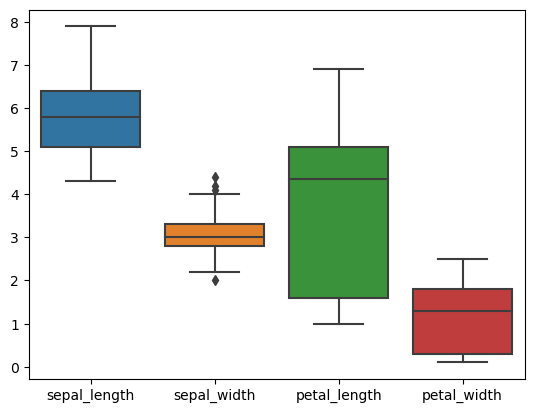

In [31]:
# 상자수염그림(박스플롯) - 시각화 교안 21page
import seaborn as sns
sns.boxplot(data=iris)

In [33]:
iris['sepal_length'].rolling(5).mean()[4:30]  # 인접한 5개의 평균 rolling(5).mean()

4     4.86
5     4.92
6     4.86
7     4.92
8     4.88
9     4.86
10    4.86
11    4.90
12    4.86
13    4.84
14    5.02
15    5.08
16    5.20
17    5.26
18    5.54
19    5.40
20    5.34
21    5.28
22    5.18
23    5.06
24    5.00
25    4.92
26    4.90
27    5.02
28    5.04
29    5.02
Name: sepal_length, dtype: float64

## 8.2 요약 통계량

- describe()


In [34]:
# 1) 기본 요약통계량
iris.describe()  # 기본값 : 숫자열에서의 요약통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
iris['species'].describe()
iris.species.describe()  # 문자열에서의 요약통계량  : 데이터갯수, 종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [36]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1,2,3]*2,
                    'b':[2.1,4]*3,
                    'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                    'd':[True,False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [37]:
df.describe()  # 숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [41]:
# include 매개변수를 통해서 요약 통계량을 출력할 타입 지정
df.describe(include=['float64','bool','object'])   

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [42]:
df.describe(include='all') # 모든 타입의 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [43]:
# exclude 매개변수를 이용해서 기본통계량 출력에서 제외할 타입을 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [45]:
df['c'].unique()    # 특정 컬럼의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [46]:
# 고유값들의 빈도
df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3 공부산/상관계수

In [48]:
# 공분산 : (x1-x1의 평균)*(x2-x2의평균) 들의 합을 n-1로 나눗값 : 범위가 따로 없음
X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [49]:
#  -1 <= 상관계수(공분산/(x1의 표준편차 * x2의 표준편차)) <= 1
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap) 시각화교안 21page

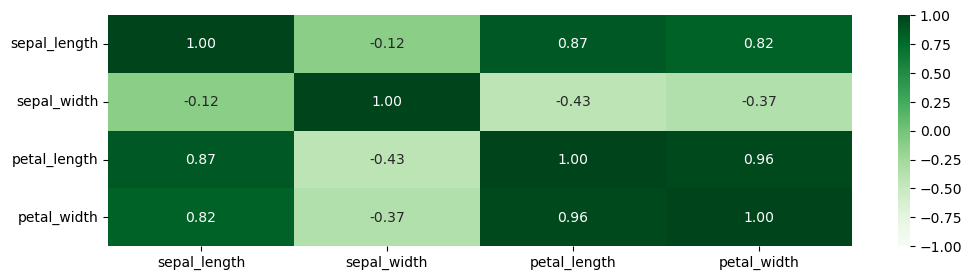

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,3))
sns.heatmap(X.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f',cmap='Greens')
plt.show()